In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

## Import Functions

In [2]:

from matplotlib import pyplot as plt
import ad_functions as adfns
from tqdm import tqdm
import pandas as pd
import numpy as np
import pytesseract
import shutil
import cv2
import os

# psm 6 = Assume a single uniform block of text.
config_tesseract = '--tessdata-dir ./ttesseract_langs --psm 6'

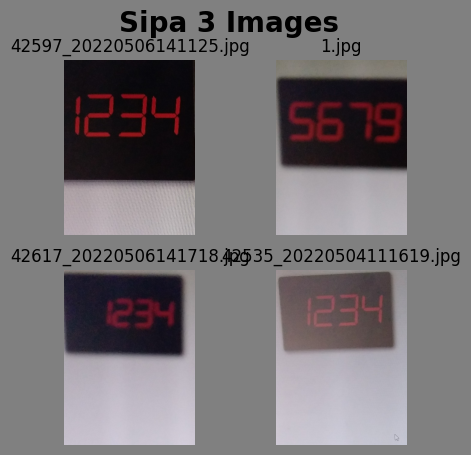

In [6]:
adfns.display_four_images("./sipaimages/2", "Sipa 3 Images")

In [37]:
sipa2 = adfns.read_input_file_list(2)

165 input images to process!!


In [39]:
type(sipa2)

pandas.core.frame.DataFrame

In [ ]:
input_data = adfns.read_input_file_list(3)
input_array = []
size_array = []

for size_to_process in range(50,650):

    loop_array = adfns.control_loop_sipa3(input_data, size_to_process)

    size_array.append(loop_array)

size_array

In [6]:
sa = np.array(size_array)
sa.tofile("size_Array_03.csv", sep=",", format='%s')

In [5]:
df = pd.read_csv('size_Array_03.csv', header=None, delimiter=",", usecols=None)

In [6]:
output_df = pd.DataFrame(columns = ['image_file', 'seen_data_numeric', 'size_used', 'closing_ssd', 'closing_eng', 'otsu_ssd', 'otsu_eng', 'gaus_ssd', 'gaus_eng'])
t_count = 0
t_sipa_count = 0
sum_array = []
t_start_element = False
for (columnName, columnData) in df.iteritems():
    
    t_count += 1


    column_to_list = columnData.tolist()
    column_to_list_string = " ".join(str(column_to_list) for x in column_to_list)

    if "sipa" in column_to_list_string:
        t_start_element = True
        t_sipa_count += 1
        # This is the first field in the group
        t_field_count = 1
        
        image_file = column_to_list_string

        if column_to_list_string not in sum_array:
            sum_array.append(column_to_list_string)

    
    if t_field_count == 2:
        # print("field counnt 2")
        try:
            seen_data_numeric = pd.to_numeric(columnData)
        except:
            seen_data_numeric = column_to_list_string
        
    
    if t_field_count == 3:
        # print("field counnt 3")
        try:
            size_used = pd.to_numeric(columnData)
        except:
            size_used = column_to_list_string


    if t_field_count == 4:
        
        try:
            thresh_ssd = pd.to_numeric(columnData)
        except:
            thresh_ssd = column_to_list_string

    
    if t_field_count == 5:
        # print("field counnt 5")
        try:
            thresh_eng = pd.to_numeric(columnData)
        except:
            thresh_eng = column_to_list_string



    if t_field_count == 6:
        # print("field counnt 6")
        try:
            closing_ssd = pd.to_numeric(columnData)
        except:
            closing_ssd = column_to_list_string

    
    if t_field_count == 7:
        # print("field counnt 7")
        try:
            closing_eng = pd.to_numeric(columnData)
        except:
            closing_eng = column_to_list_string

    if t_field_count == 8:
        # print("field counnt 8")
        try:
            otsu_ssd = pd.to_numeric(columnData)
        except:
            otsu_ssd = column_to_list_string

    
    if t_field_count == 9:
        # print("field counnt 7")
        try:
            otsu_eng = pd.to_numeric(columnData)
        except:
            otsu_eng = column_to_list_string

    if t_field_count == 10:
        # print("field counnt 8")
        try:
            gaus_ssd = pd.to_numeric(columnData)
        except:
            gaus_ssd = column_to_list_string

    
    if t_field_count == 11:
        # print("field counnt 7")
        try:
            gaus_eng = pd.to_numeric(columnData)
        except:
            gaus_eng = column_to_list_string

        

        new_row = {
            'image_file' : image_file, 
            'seen_data_numeric' : seen_data_numeric, 
            'size_used' : size_used, 
            'thresh_ssd' : thresh_ssd, 
            'thresh_eng' : thresh_eng, 
            'closing_ssd' : closing_ssd, 
            'closing_eng' : closing_eng, 
            'otsu_ssd' : otsu_ssd, 
            'otsu_eng' : otsu_eng,
            'gaus_ssd' : gaus_ssd,
            'gaus_eng' : gaus_eng
            }
        # output_df = output_df.append(new_row, ignore_index=True)
        output_df = pd.concat([output_df, pd.DataFrame.from_records(new_row)])
        # write_row(image_file, seen_data_numeric, size_used, closing_ssd, closing_eng, mro_ssd, mro_eng)
    


    t_field_count += 1
        
        


print(t_count)
print(t_sipa_count)

171600
15600


In [7]:
output_df.to_csv("sipa3_analysis_data.csv")

In [11]:
sipa3_data = pd.read_csv("sipa3_analysis_data.csv", index_col=0)

sipa3_data['thresh_eng'] = pd.to_numeric(sipa3_data['thresh_eng'], errors='coerce')
sipa3_data['thresh_eng'] = sipa3_data['thresh_eng'].fillna(0)

sipa3_data['thresh_ssd'] = pd.to_numeric(sipa3_data['thresh_ssd'], errors='coerce')
sipa3_data['thresh_ssd'] = sipa3_data['thresh_ssd'].fillna(0)

sipa3_data['closing_eng'] = pd.to_numeric(sipa3_data['closing_eng'], errors='coerce')
sipa3_data['closing_eng'] = sipa3_data['closing_eng'].fillna(0)

sipa3_data['closing_ssd'] = pd.to_numeric(sipa3_data['closing_ssd'], errors='coerce')
sipa3_data['closing_ssd'] = sipa3_data['closing_ssd'].fillna(0)

sipa3_data['otsu_eng'] = pd.to_numeric(sipa3_data['otsu_eng'], errors='coerce')
sipa3_data['otsu_eng'] = sipa3_data['otsu_eng'].fillna(0)

sipa3_data['otsu_ssd'] = pd.to_numeric(sipa3_data['otsu_ssd'], errors='coerce')
sipa3_data['otsu_ssd'] = sipa3_data['otsu_ssd'].fillna(0)

sipa3_data['gaus_eng'] = pd.to_numeric(sipa3_data['gaus_eng'], errors='coerce')
sipa3_data['gaus_eng'] = sipa3_data['gaus_eng'].fillna(0)

sipa3_data['gaus_ssd'] = pd.to_numeric(sipa3_data['gaus_ssd'], errors='coerce')
sipa3_data['gaus_ssd'] = sipa3_data['gaus_ssd'].fillna(0)





In [9]:
sipa3_data

,image_file,seen_data_numeric,size_used,closing_ssd,closing_eng,otsu_ssd,otsu_eng,gaus_ssd,gaus_eng,thresh_eng,thresh_ssd
0,['.\\sipaimages\\3\\1.jpg'],30.31,50,18.00,0.00,31.000000,0.000,1.100000e+01,0.0,2.00,331.00
0,['.\\sipaimages\\3\\10.jpg'],13.05,50,1.00,0.00,106.000000,135.000,1.380000e+02,1308.0,1305.00,138.00
0,['.\\sipaimages\\3\\11.jpg'],20.59,50,1.00,0.00,1.000000,5.000,0.000000e+00,0.0,0.00,19.00
0,['.\\sipaimages\\3\\12.jpg'],13.05,50,0.00,0.00,106.000000,1305.000,1.000000e+01,1305.0,13.05,13.09
0,['.\\sipaimages\\3\\13.jpg'],30.31,50,0.00,0.00,31.000000,3.000,1.000000e+00,3.0,0.00,30.10
...,...,...,...,...,...,...,...,...,...,...,...
0,['.\\sipaimages\\3\\5.jpg'],30.30,649,30.00,3.00,30.400470,0.303,0.000000e+00,0.0,30.00,3.00
0,['.\\sipaimages\\3\\6.jpg'],13.04,649,104.00,4.00,0.000000,0.000,0.000000e+00,0.0,4.00,14.00
0,['.\\sipaimages\\3\\7.jpg'],13.04,649,15.04,13.04,940281.100000,0.000,0.000000e+00,0.0,1301.00,0.00
0,['.\\sipaimages\\3\\8.jpg'],30.31,649,1.00,3031.00,30.494011,303.000,0.000000e+00,0.0,31.00,1.00


In [10]:

# Get a list of the unique images in the dataframe
unique_images = sipa3_data['image_file'].unique()

# Initialize empty lists to store the counts

thresh_ssd_equal_counts = []
thresh_ssd_not_equal_counts = []
thresh_eng_equal_counts = []
thresh_eng_not_equal_counts = []

closing_ssd_equal_counts = []
closing_ssd_not_equal_counts = []
closing_eng_equal_counts = []
closing_eng_not_equal_counts = []

otsu_ssd_equal_counts = []
otsu_ssd_not_equal_counts = []
otsu_eng_equal_counts = []
otsu_eng_not_equal_counts = []

gaus_ssd_equal_counts = []
gaus_ssd_not_equal_counts = []
gaus_eng_equal_counts = []
gaus_eng_not_equal_counts = []

# Iterate over the unique images
for image in unique_images:
   

    # Filter the dataframe to include only rows with the current image
    image_df = sipa3_data[sipa3_data['image_file'] == image]


    
    # THRESH
    
    # Count the number of times seen_data_numeric is equal to thresh_ssd for the current image
    thresh_ssd_equal_count = image_df[image_df['seen_data_numeric'] == image_df['thresh_ssd']].shape[0]
    
    # Count the number of times seen_data_numeric is not equal to thresh_ssd for the current image
    thresh_ssd_not_equal_count = image_df[image_df['seen_data_numeric'] != image_df['thresh_ssd']].shape[0]

    # Count the number of times seen_data_numeric is equal to thresh_eng for the current image
    thresh_eng_equal_count = image_df[image_df['seen_data_numeric'] == image_df['thresh_eng']].shape[0]
    
    # Count the number of times seen_data_numeric is not equal to thresh_eng for the current image
    thresh_eng_not_equal_count = image_df[image_df['seen_data_numeric'] != image_df['thresh_eng']].shape[0]


    # CLOSING
    
    # Count the number of times seen_data_numeric is equal to closing_ssd for the current image
    closing_ssd_equal_count = image_df[image_df['seen_data_numeric'] == image_df['closing_ssd']].shape[0]
    
    # Count the number of times seen_data_numeric is not equal to closing_ssd for the current image
    closing_ssd_not_equal_count = image_df[image_df['seen_data_numeric'] != image_df['closing_ssd']].shape[0]

    # Count the number of times seen_data_numeric is equal to closing_eng for the current image
    closing_eng_equal_count = image_df[image_df['seen_data_numeric'] == image_df['closing_eng']].shape[0]
    
    # Count the number of times seen_data_numeric is not equal to closing_eng for the current image
    closing_eng_not_equal_count = image_df[image_df['seen_data_numeric'] != image_df['closing_eng']].shape[0]


    # Otsu Counts   
    # Count the number of times seen_data_numeric is equal to otsu_ssd for the current image
    otsu_ssd_equal_count = image_df[image_df['seen_data_numeric'] == image_df['otsu_ssd']].shape[0]
    
    # Count the number of times seen_data_numeric is not equal to otsu_ssd for the current image
    otsu_ssd_not_equal_count = image_df[image_df['seen_data_numeric'] != image_df['otsu_ssd']].shape[0]

    # Count the number of times seen_data_numeric is equal to otsu_eng for the current image
    otsu_eng_equal_count = image_df[image_df['seen_data_numeric'] == image_df['otsu_eng']].shape[0]
    
    # Count the number of times seen_data_numeric is not equal to otsu_eng for the current image
    otsu_eng_not_equal_count = image_df[image_df['seen_data_numeric'] != image_df['otsu_eng']].shape[0]
    

    # Gaussian Counts   
    # Count the number of times seen_data_numeric is equal to gaus_ssd for the current image
    gaus_ssd_equal_count = image_df[image_df['seen_data_numeric'] == image_df['otsu_ssd']].shape[0]
    
    # Count the number of times seen_data_numeric is not equal to gaus_ssd for the current image
    gaus_ssd_not_equal_count = image_df[image_df['seen_data_numeric'] != image_df['otsu_ssd']].shape[0]

    # Count the number of times seen_data_numeric is equal to gaus_eng for the current image
    gaus_eng_equal_count = image_df[image_df['seen_data_numeric'] == image_df['otsu_eng']].shape[0]
    
    # Count the number of times seen_data_numeric is not equal to gaus_eng for the current image
    gaus_eng_not_equal_count = image_df[image_df['seen_data_numeric'] != image_df['otsu_eng']].shape[0]
    
    # Add the counts to the lists
    thresh_ssd_equal_counts.append(thresh_ssd_equal_count)
    thresh_ssd_not_equal_counts.append(thresh_ssd_not_equal_count)
    thresh_eng_equal_counts.append(thresh_eng_equal_count)
    thresh_eng_not_equal_counts.append(thresh_eng_not_equal_count)

    closing_ssd_equal_counts.append(closing_ssd_equal_count)
    closing_ssd_not_equal_counts.append(closing_ssd_not_equal_count)
    closing_eng_equal_counts.append(closing_eng_equal_count)
    closing_eng_not_equal_counts.append(closing_eng_not_equal_count)

    otsu_ssd_equal_counts.append(otsu_ssd_equal_count)
    otsu_ssd_not_equal_counts.append(otsu_ssd_not_equal_count)
    otsu_eng_equal_counts.append(otsu_eng_equal_count)
    otsu_eng_not_equal_counts.append(otsu_eng_not_equal_count)

    gaus_ssd_equal_counts.append(gaus_ssd_equal_count)
    gaus_ssd_not_equal_counts.append(gaus_ssd_not_equal_count)
    gaus_eng_equal_counts.append(gaus_eng_equal_count)
    gaus_eng_not_equal_counts.append(gaus_eng_not_equal_count)

# Create a new dataframe with the counts as columns
output_df = pd.DataFrame({
    'thresh_ssd_equal_count': thresh_ssd_equal_counts,
    'thresh_ssd_not_equal_count': thresh_ssd_not_equal_counts,
    'thresh_eng_equal_count': thresh_eng_equal_counts,
    'thresh_eng_not_equal_count': thresh_eng_not_equal_counts,
    'closing_ssd_equal_count': closing_ssd_equal_counts,
    'closing_ssd_not_equal_count': closing_ssd_not_equal_counts,
    'closing_eng_equal_count': closing_eng_equal_counts,
    'closing_eng_not_equal_count': closing_eng_not_equal_counts,
    'otsu_ssd_equal_count': otsu_ssd_equal_counts,
    'otsu_ssd_not_equal_count': otsu_ssd_not_equal_counts,
    'otsu_eng_equal_count': otsu_eng_equal_counts,
    'otsu_eng_not_equal_count': otsu_eng_not_equal_counts,
    'gaus_ssd_equal_count': gaus_ssd_equal_counts,
    'gaus_ssd_not_equal_count': gaus_ssd_not_equal_counts,
    'gaus_eng_equal_count': gaus_eng_equal_counts,
    'gaus_eng_not_equal_count': gaus_eng_not_equal_counts
}, index=unique_images)

# output_df.insert(0, 'image_file', unique_images.strip('[]'))

stripped_images = [image.strip("[]'") for image in unique_images]
output_df.insert(0, 'image_file', stripped_images)

# Save the output dataframe to a CSV file
output_df.to_csv('sipa3_count_analysis.csv', index=False, header=True)


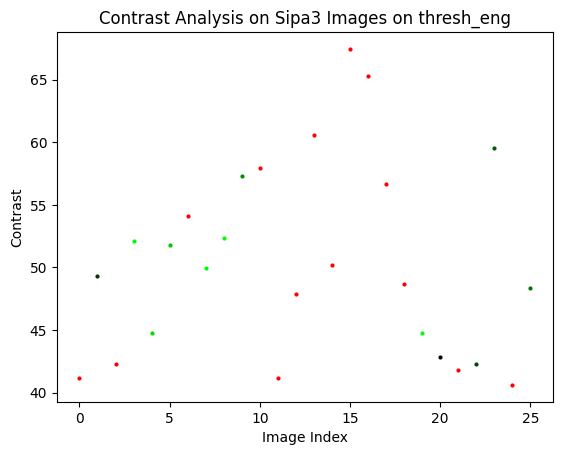

In [12]:
df = pd.read_csv('sipa3_count_analysis.csv')

# List to store the contrasts of the images
contrasts = []

# Loop through the rows in the dataframe
for index, row in df.iterrows():
    # Extract the file name from the list
    filename = row['image_file']

    # Load the image using OpenCV
    image = cv2.imread(filename)

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Compute the contrast of the image by calculating the standard deviation of the pixel intensities
    contrast = cv2.meanStdDev(gray_image)[1][0][0]

    # Add the contrast value to the list
    contrasts.append(contrast)

    # Check if thresh_eng_equal_count is greater than 0
    if row['thresh_eng_equal_count'] > 0:
        # If it is, plot the dot in green with a gradient
        plt.scatter(index, contrast, color=(0, row['thresh_eng_equal_count']/max(df['thresh_eng_equal_count']), 0), marker='o', s=4)
    else:
        # Otherwise, plot the dot in red
        plt.plot(index, contrast, 'ro', markersize=2)

# Add labels to the x and y axis
plt.xlabel('Image Index')
plt.ylabel('Contrast')
plt.title("Contrast Analysis on Sipa3 Images on thresh_eng")

plt.show()

In [12]:
size_fields_df = sipa3_data[['size_used', 'seen_data_numeric', 'thresh_ssd', 'thresh_eng']]

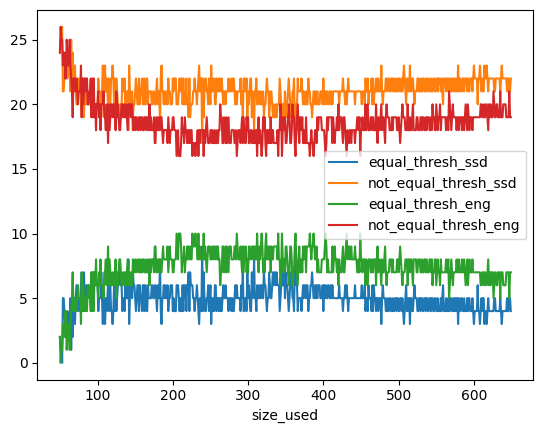

In [13]:
# group the data by the size_used field
grouped_data = size_fields_df.groupby('size_used')

# count the number of times seen_data_numeric equals mro_ssd and does not equal mro_ssd
equal_thresh_ssd = grouped_data['size_used'].apply(lambda x: (grouped_data.get_group(x.name)['seen_data_numeric'].eq(grouped_data.get_group(x.name)['thresh_ssd'])).sum())
not_equal_thresh_ssd = grouped_data['size_used'].apply(lambda x: (grouped_data.get_group(x.name)['seen_data_numeric'].ne(grouped_data.get_group(x.name)['thresh_ssd'])).sum())

# do the same for mro_eng
equal_thresh_eng = grouped_data['size_used'].apply(lambda x: (grouped_data.get_group(x.name)['seen_data_numeric'].eq(grouped_data.get_group(x.name)['thresh_eng'])).sum())
not_equal_thresh_eng = grouped_data['size_used'].apply(lambda x: (grouped_data.get_group(x.name)['seen_data_numeric'].ne(grouped_data.get_group(x.name)['thresh_eng'])).sum())

# create a new dataframe with the results
results_df = pd.DataFrame({'equal_thresh_ssd': equal_thresh_ssd,
                           'not_equal_thresh_ssd': not_equal_thresh_ssd,
                           'equal_thresh_eng': equal_thresh_eng,
                           'not_equal_thresh_eng': not_equal_thresh_eng})

results_df.plot()
plt.show()

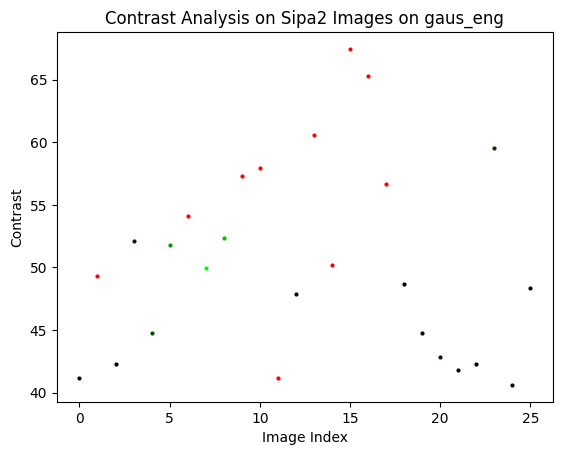

In [14]:
df = pd.read_csv('sipa3_count_analysis.csv')

# List to store the contrasts of the images
contrasts = []

# Loop through the rows in the dataframe
for index, row in df.iterrows():
    # Extract the file name from the list
    filename = row['image_file']

    # Load the image using OpenCV
    image = cv2.imread(filename)

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Compute the contrast of the image by calculating the standard deviation of the pixel intensities
    contrast = cv2.meanStdDev(gray_image)[1][0][0]

    # Add the contrast value to the list
    contrasts.append(contrast)

    # Check if gaus_eng_equal_count is greater than 0
    if row['gaus_eng_equal_count'] > 0:
        # If it is, plot the dot in green with a gradient
        plt.scatter(index, contrast, color=(0, row['gaus_eng_equal_count']/max(df['gaus_eng_equal_count']), 0), marker='o', s=4)
    else:
        # Otherwise, plot the dot in red
        plt.plot(index, contrast, 'ro', markersize=2)

# Add labels to the x and y axis
plt.xlabel('Image Index')
plt.ylabel('Contrast')
plt.title("Contrast Analysis on Sipa2 Images on gaus_eng")

plt.show()

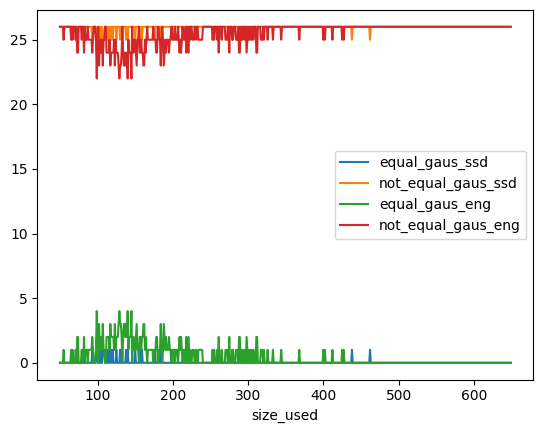

In [16]:
size_fields_df = sipa3_data[['size_used', 'seen_data_numeric', 'gaus_ssd', 'gaus_eng']]

# group the data by the size_used field
grouped_data = size_fields_df.groupby('size_used')

# count the number of times seen_data_numeric equals mro_ssd and does not equal gaus_ssd
equal_gaus_ssd = grouped_data['size_used'].apply(lambda x: (grouped_data.get_group(x.name)['seen_data_numeric'].eq(grouped_data.get_group(x.name)['gaus_ssd'])).sum())
not_equal_gaus_ssd = grouped_data['size_used'].apply(lambda x: (grouped_data.get_group(x.name)['seen_data_numeric'].ne(grouped_data.get_group(x.name)['gaus_ssd'])).sum())

# do the same for gaus_eng
equal_gaus_eng = grouped_data['size_used'].apply(lambda x: (grouped_data.get_group(x.name)['seen_data_numeric'].eq(grouped_data.get_group(x.name)['gaus_eng'])).sum())
not_equal_gaus_eng = grouped_data['size_used'].apply(lambda x: (grouped_data.get_group(x.name)['seen_data_numeric'].ne(grouped_data.get_group(x.name)['gaus_eng'])).sum())

# create a new dataframe with the results
results_df = pd.DataFrame({'equal_gaus_ssd': equal_gaus_ssd,
                           'not_equal_gaus_ssd': not_equal_gaus_ssd,
                           'equal_gaus_eng': equal_gaus_eng,
                           'not_equal_gaus_eng': not_equal_gaus_eng})

results_df.plot()
plt.show()

# SIPA 5

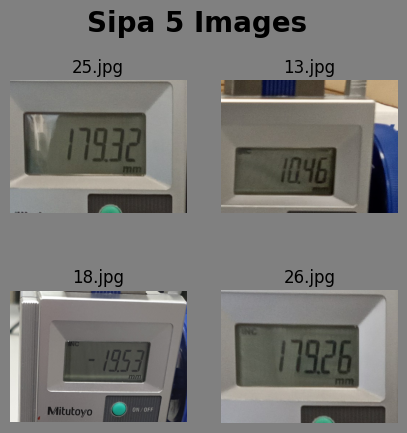

In [9]:
adfns.display_four_images("./sipaimages/5", "Sipa 5 Images")

In [ ]:
input_data = adfns.read_input_file_list(5)
input_array = []
size_array = []

for size_to_process in range(50,650):

    loop_array = adfns.control_loop_sipa3(input_data, size_to_process)

    size_array.append(loop_array)

size_array

In [19]:
sa = np.array(size_array)
sa.tofile("size_Array_05.csv", sep=",", format='%s')

In [20]:
df = pd.read_csv('size_Array_05.csv', header=None, delimiter=",", usecols=None)

In [21]:
output_df = pd.DataFrame(columns = ['image_file', 'seen_data_numeric', 'size_used', 'closing_ssd', 'closing_eng', 'otsu_ssd', 'otsu_eng', 'gaus_ssd', 'gaus_eng'])
t_count = 0
t_sipa_count = 0
sum_array = []
t_start_element = False
for (columnName, columnData) in df.iteritems():
    
    t_count += 1


    column_to_list = columnData.tolist()
    column_to_list_string = " ".join(str(column_to_list) for x in column_to_list)

    if "sipa" in column_to_list_string:
        t_start_element = True
        t_sipa_count += 1
        # This is the first field in the group
        t_field_count = 1
        
        image_file = column_to_list_string

        if column_to_list_string not in sum_array:
            sum_array.append(column_to_list_string)

    
    if t_field_count == 2:
        # print("field counnt 2")
        try:
            seen_data_numeric = pd.to_numeric(columnData)
        except:
            seen_data_numeric = column_to_list_string
        
    
    if t_field_count == 3:
        # print("field counnt 3")
        try:
            size_used = pd.to_numeric(columnData)
        except:
            size_used = column_to_list_string


    if t_field_count == 4:
        
        try:
            thresh_ssd = pd.to_numeric(columnData)
        except:
            thresh_ssd = column_to_list_string

    
    if t_field_count == 5:
        # print("field counnt 5")
        try:
            thresh_eng = pd.to_numeric(columnData)
        except:
            thresh_eng = column_to_list_string



    if t_field_count == 6:
        # print("field counnt 6")
        try:
            closing_ssd = pd.to_numeric(columnData)
        except:
            closing_ssd = column_to_list_string

    
    if t_field_count == 7:
        # print("field counnt 7")
        try:
            closing_eng = pd.to_numeric(columnData)
        except:
            closing_eng = column_to_list_string

    if t_field_count == 8:
        # print("field counnt 8")
        try:
            otsu_ssd = pd.to_numeric(columnData)
        except:
            otsu_ssd = column_to_list_string

    
    if t_field_count == 9:
        # print("field counnt 7")
        try:
            otsu_eng = pd.to_numeric(columnData)
        except:
            otsu_eng = column_to_list_string

    if t_field_count == 10:
        # print("field counnt 8")
        try:
            gaus_ssd = pd.to_numeric(columnData)
        except:
            gaus_ssd = column_to_list_string

    
    if t_field_count == 11:
        # print("field counnt 7")
        try:
            gaus_eng = pd.to_numeric(columnData)
        except:
            gaus_eng = column_to_list_string

        

        new_row = {
            'image_file' : image_file, 
            'seen_data_numeric' : seen_data_numeric, 
            'size_used' : size_used, 
            'thresh_ssd' : thresh_ssd, 
            'thresh_eng' : thresh_eng, 
            'closing_ssd' : closing_ssd, 
            'closing_eng' : closing_eng, 
            'otsu_ssd' : otsu_ssd, 
            'otsu_eng' : otsu_eng,
            'gaus_ssd' : gaus_ssd,
            'gaus_eng' : gaus_eng
            }
        # output_df = output_df.append(new_row, ignore_index=True)
        output_df = pd.concat([output_df, pd.DataFrame.from_records(new_row)])
        # write_row(image_file, seen_data_numeric, size_used, closing_ssd, closing_eng, mro_ssd, mro_eng)
    


    t_field_count += 1
        
        


print(t_count)
print(t_sipa_count)

178200
16200


In [22]:
output_df.to_csv("sipa5_analysis_data.csv")

In [25]:
sipa5_data = pd.read_csv("sipa5_analysis_data.csv", index_col=0)

sipa5_data['thresh_eng'] = pd.to_numeric(sipa5_data['thresh_eng'], errors='coerce')
sipa5_data['thresh_eng'] = sipa5_data['thresh_eng'].fillna(0)

sipa5_data['thresh_ssd'] = pd.to_numeric(sipa5_data['thresh_ssd'], errors='coerce')
sipa5_data['thresh_ssd'] = sipa5_data['thresh_ssd'].fillna(0)

sipa5_data['closing_eng'] = pd.to_numeric(sipa5_data['closing_eng'], errors='coerce')
sipa5_data['closing_eng'] = sipa5_data['closing_eng'].fillna(0)

sipa5_data['closing_ssd'] = pd.to_numeric(sipa5_data['closing_ssd'], errors='coerce')
sipa5_data['closing_ssd'] = sipa5_data['closing_ssd'].fillna(0)

sipa5_data['otsu_eng'] = pd.to_numeric(sipa5_data['otsu_eng'], errors='coerce')
sipa5_data['otsu_eng'] = sipa5_data['otsu_eng'].fillna(0)

sipa5_data['otsu_ssd'] = pd.to_numeric(sipa5_data['otsu_ssd'], errors='coerce')
sipa5_data['otsu_ssd'] = sipa5_data['otsu_ssd'].fillna(0)

sipa5_data['gaus_eng'] = pd.to_numeric(sipa5_data['gaus_eng'], errors='coerce')
sipa5_data['gaus_eng'] = sipa5_data['gaus_eng'].fillna(0)

sipa5_data['gaus_ssd'] = pd.to_numeric(sipa5_data['gaus_ssd'], errors='coerce')
sipa5_data['gaus_ssd'] = sipa5_data['gaus_ssd'].fillna(0)




In [24]:
# Get a list of the unique images in the dataframe
unique_images = sipa5_data['image_file'].unique()

# Initialize empty lists to store the counts

thresh_ssd_equal_counts = []
thresh_ssd_not_equal_counts = []
thresh_eng_equal_counts = []
thresh_eng_not_equal_counts = []

closing_ssd_equal_counts = []
closing_ssd_not_equal_counts = []
closing_eng_equal_counts = []
closing_eng_not_equal_counts = []

otsu_ssd_equal_counts = []
otsu_ssd_not_equal_counts = []
otsu_eng_equal_counts = []
otsu_eng_not_equal_counts = []

gaus_ssd_equal_counts = []
gaus_ssd_not_equal_counts = []
gaus_eng_equal_counts = []
gaus_eng_not_equal_counts = []

# Iterate over the unique images
for image in unique_images:
   

    # Filter the dataframe to include only rows with the current image
    image_df = sipa5_data[sipa5_data['image_file'] == image]


    
    # THRESH
    
    # Count the number of times seen_data_numeric is equal to thresh_ssd for the current image
    thresh_ssd_equal_count = image_df[image_df['seen_data_numeric'] == image_df['thresh_ssd']].shape[0]
    
    # Count the number of times seen_data_numeric is not equal to thresh_ssd for the current image
    thresh_ssd_not_equal_count = image_df[image_df['seen_data_numeric'] != image_df['thresh_ssd']].shape[0]

    # Count the number of times seen_data_numeric is equal to thresh_eng for the current image
    thresh_eng_equal_count = image_df[image_df['seen_data_numeric'] == image_df['thresh_eng']].shape[0]
    
    # Count the number of times seen_data_numeric is not equal to thresh_eng for the current image
    thresh_eng_not_equal_count = image_df[image_df['seen_data_numeric'] != image_df['thresh_eng']].shape[0]


    # CLOSING
    
    # Count the number of times seen_data_numeric is equal to closing_ssd for the current image
    closing_ssd_equal_count = image_df[image_df['seen_data_numeric'] == image_df['closing_ssd']].shape[0]
    
    # Count the number of times seen_data_numeric is not equal to closing_ssd for the current image
    closing_ssd_not_equal_count = image_df[image_df['seen_data_numeric'] != image_df['closing_ssd']].shape[0]

    # Count the number of times seen_data_numeric is equal to closing_eng for the current image
    closing_eng_equal_count = image_df[image_df['seen_data_numeric'] == image_df['closing_eng']].shape[0]
    
    # Count the number of times seen_data_numeric is not equal to closing_eng for the current image
    closing_eng_not_equal_count = image_df[image_df['seen_data_numeric'] != image_df['closing_eng']].shape[0]


    # Otsu Counts   
    # Count the number of times seen_data_numeric is equal to otsu_ssd for the current image
    otsu_ssd_equal_count = image_df[image_df['seen_data_numeric'] == image_df['otsu_ssd']].shape[0]
    
    # Count the number of times seen_data_numeric is not equal to otsu_ssd for the current image
    otsu_ssd_not_equal_count = image_df[image_df['seen_data_numeric'] != image_df['otsu_ssd']].shape[0]

    # Count the number of times seen_data_numeric is equal to otsu_eng for the current image
    otsu_eng_equal_count = image_df[image_df['seen_data_numeric'] == image_df['otsu_eng']].shape[0]
    
    # Count the number of times seen_data_numeric is not equal to otsu_eng for the current image
    otsu_eng_not_equal_count = image_df[image_df['seen_data_numeric'] != image_df['otsu_eng']].shape[0]
    

    # Gaussian Counts   
    # Count the number of times seen_data_numeric is equal to gaus_ssd for the current image
    gaus_ssd_equal_count = image_df[image_df['seen_data_numeric'] == image_df['otsu_ssd']].shape[0]
    
    # Count the number of times seen_data_numeric is not equal to gaus_ssd for the current image
    gaus_ssd_not_equal_count = image_df[image_df['seen_data_numeric'] != image_df['otsu_ssd']].shape[0]

    # Count the number of times seen_data_numeric is equal to gaus_eng for the current image
    gaus_eng_equal_count = image_df[image_df['seen_data_numeric'] == image_df['otsu_eng']].shape[0]
    
    # Count the number of times seen_data_numeric is not equal to gaus_eng for the current image
    gaus_eng_not_equal_count = image_df[image_df['seen_data_numeric'] != image_df['otsu_eng']].shape[0]
    
    # Add the counts to the lists
    thresh_ssd_equal_counts.append(thresh_ssd_equal_count)
    thresh_ssd_not_equal_counts.append(thresh_ssd_not_equal_count)
    thresh_eng_equal_counts.append(thresh_eng_equal_count)
    thresh_eng_not_equal_counts.append(thresh_eng_not_equal_count)

    closing_ssd_equal_counts.append(closing_ssd_equal_count)
    closing_ssd_not_equal_counts.append(closing_ssd_not_equal_count)
    closing_eng_equal_counts.append(closing_eng_equal_count)
    closing_eng_not_equal_counts.append(closing_eng_not_equal_count)

    otsu_ssd_equal_counts.append(otsu_ssd_equal_count)
    otsu_ssd_not_equal_counts.append(otsu_ssd_not_equal_count)
    otsu_eng_equal_counts.append(otsu_eng_equal_count)
    otsu_eng_not_equal_counts.append(otsu_eng_not_equal_count)

    gaus_ssd_equal_counts.append(gaus_ssd_equal_count)
    gaus_ssd_not_equal_counts.append(gaus_ssd_not_equal_count)
    gaus_eng_equal_counts.append(gaus_eng_equal_count)
    gaus_eng_not_equal_counts.append(gaus_eng_not_equal_count)

# Create a new dataframe with the counts as columns
output_df = pd.DataFrame({
    'thresh_ssd_equal_count': thresh_ssd_equal_counts,
    'thresh_ssd_not_equal_count': thresh_ssd_not_equal_counts,
    'thresh_eng_equal_count': thresh_eng_equal_counts,
    'thresh_eng_not_equal_count': thresh_eng_not_equal_counts,
    'closing_ssd_equal_count': closing_ssd_equal_counts,
    'closing_ssd_not_equal_count': closing_ssd_not_equal_counts,
    'closing_eng_equal_count': closing_eng_equal_counts,
    'closing_eng_not_equal_count': closing_eng_not_equal_counts,
    'otsu_ssd_equal_count': otsu_ssd_equal_counts,
    'otsu_ssd_not_equal_count': otsu_ssd_not_equal_counts,
    'otsu_eng_equal_count': otsu_eng_equal_counts,
    'otsu_eng_not_equal_count': otsu_eng_not_equal_counts,
    'gaus_ssd_equal_count': gaus_ssd_equal_counts,
    'gaus_ssd_not_equal_count': gaus_ssd_not_equal_counts,
    'gaus_eng_equal_count': gaus_eng_equal_counts,
    'gaus_eng_not_equal_count': gaus_eng_not_equal_counts
}, index=unique_images)

# output_df.insert(0, 'image_file', unique_images.strip('[]'))

stripped_images = [image.strip("[]'") for image in unique_images]
output_df.insert(0, 'image_file', stripped_images)

# Save the output dataframe to a CSV file
output_df.to_csv('sipa5_count_analysis.csv', index=False, header=True)


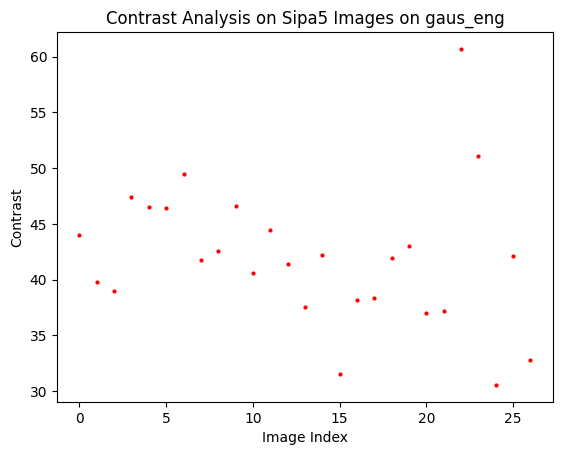

In [8]:
df = pd.read_csv('sipa5_count_analysis.csv')

# List to store the contrasts of the images
contrasts = []

# Loop through the rows in the dataframe
for index, row in df.iterrows():
    # Extract the file name from the list
    filename = row['image_file']

    # Load the image using OpenCV
    image = cv2.imread(filename)

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Compute the contrast of the image by calculating the standard deviation of the pixel intensities
    contrast = cv2.meanStdDev(gray_image)[1][0][0]

    # Add the contrast value to the list
    contrasts.append(contrast)

    # Check if gaus_eng_equal_count is greater than 0
    if row['gaus_eng_equal_count'] > 0:
        # If it is, plot the dot in green with a gradient
        plt.scatter(index, contrast, color=(0, row['gaus_eng_equal_count']/max(df['gaus_eng_equal_count']), 0), marker='o', s=4)
    else:
        # Otherwise, plot the dot in red
        plt.plot(index, contrast, 'ro', markersize=2)

# Add labels to the x and y axis
plt.xlabel('Image Index')
plt.ylabel('Contrast')
plt.title("Contrast Analysis on Sipa5 Images on gaus_eng")

plt.show()